## Preprocess

In [282]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso


import warnings
warnings.filterwarnings("ignore")

In [283]:
# from google.colab import drive
# drive.mount('/content/drive')

In [284]:
!wget -O ndtv_data_final.csv "https://drive.google.com/uc?export=download&id=1q0Yn7OY8w-yPkIkDYSQ4L57n5CDaKU9a"

--2025-11-14 10:23:10--  https://drive.google.com/uc?export=download&id=1q0Yn7OY8w-yPkIkDYSQ4L57n5CDaKU9a
Resolving drive.google.com (drive.google.com)... 108.177.12.100, 108.177.12.113, 108.177.12.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1q0Yn7OY8w-yPkIkDYSQ4L57n5CDaKU9a&export=download [following]
--2025-11-14 10:23:10--  https://drive.usercontent.google.com/download?id=1q0Yn7OY8w-yPkIkDYSQ4L57n5CDaKU9a&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156326 (153K) [application/octet-stream]
Saving to: ‘ndtv_data_final.csv’

ndtv_data_final.csv 100%[===================>] 152.66K  --.-

In [285]:
!ls

ndtv_data_final.csv  preprocessed_data.csv  sample_data


In [286]:

data_path = 'ndtv_data_final.csv'
df = pd.read_csv(data_path, index_col=0)
print(df.head())


                             Name    Brand                   Model  \
0  OnePlus 7T Pro McLaren Edition  OnePlus  7T Pro McLaren Edition   
1                   Realme X2 Pro   Realme                  X2 Pro   
2               iPhone 11 Pro Max    Apple       iPhone 11 Pro Max   
3                       iPhone 11    Apple               iPhone 11   
4                    LG G8X ThinQ       LG               G8X ThinQ   

   Battery capacity (mAh)  Screen size (inches) Touchscreen  Resolution x  \
0                    4085                  6.67         Yes          1440   
1                    4000                  6.50         Yes          1080   
2                    3969                  6.50         Yes          1242   
3                    3110                  6.10         Yes           828   
4                    4000                  6.40         Yes          1080   

   Resolution y  Processor  RAM (MB)  ...  Rear camera  Front camera  \
0          3120          8     12000  ...   

In [287]:
print(df.shape)

(1359, 21)


Bộ dữ liệu gồm 1359 mẫu, 21 trường.
Mỗi hàng là một mẫu.

In [288]:
# Displaying column names
df.columns

Index(['Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')



* `Name` và `Model` Tên và loại của máy. Nó không cần thiết cho mô hình.

* `Brand` Tên công ty sản xuất ra điện thoại. Là cột kiểu phân loại.

* `Battery capacity (mAh)` Dung lượng pin. Kiểu số.

* `Screen size (inches)`, `Resolution x`, and `Resolution y` Kích thước màn hình. Kiểu số.

* `Touchscreen` Kiểu phân loại, **Yes** nếu có màn hình cảm ứng, **No** nếu không có.

* `Processor` Số nhân xử lý (của vi xử lý) Kiểu số.

* `RAM (MB)` Bộ nhớ trong. Kiểu số.

* `Internal storage (GB))` Bộ nhớ lưu trữ. Kiểu số

* `Rear camera` and `Front camera` Độ phân giải camera sau và trước. Dạng số

* `Operating system` Hệ điều hành. Dạng phân loại.

* `Wi-Fi`, `Bluetooth`, `GPS`, `Number of SIMs`, `3G`, `4G/ LTE` Wifi, Bluetooth, GPS (Định  vị), Đa sim, 3G, 4G. **Yes** là có hỗ trợ và **No** là không hỗ trợ.

In [289]:
# Loại bỏ cột không cần thiết.
df = df.drop(['Name', 'Model'], axis=1)
df.shape

(1359, 19)

In [290]:
# Đổi đơn vị
# Đơn vị Ram đổi thành GB, đơn vị tính giá tiền từ INR (Rupee ấn độ) thành USD (Đô la Mỹ)

# RAM in GB
df['RAM'] = df['RAM (MB)'] / 1000
df.drop('RAM (MB)', axis=1, inplace=True)

# Prices in USD (1 INR bằng 0.011 USD tại thời điểm 7 Nov 2025)
df['Price'] = df['Price'] * 0.011

In [291]:
# Kiểm tra giá trị thiếu
df.isna().sum()

,0
Brand,0
Battery capacity (mAh),0
Screen size (inches),0
Touchscreen,0
Resolution x,0
Resolution y,0
Processor,0
Internal storage (GB),0
Rear camera,0
Front camera,0


Không có giá trị thiếu nào.

In [292]:
df.describe()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price,RAM
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,2938.489330,5.291310,811.543046,1490.777778,5.551141,30.654864,12.070199,7.037969,1.833701,126.124082,2.488778
std,873.514133,0.671357,270.707271,557.780120,2.196562,36.950241,8.948337,6.295448,0.374457,152.432468,1.664440
min,1010.000000,2.400000,240.000000,320.000000,1.000000,0.064000,0.000000,0.000000,1.000000,5.434000,0.064000
25%,2300.000000,5.000000,720.000000,1280.000000,4.000000,8.000000,8.000000,2.000000,2.000000,52.398500,1.000000
50%,3000.000000,5.200000,720.000000,1280.000000,4.000000,16.000000,12.200000,5.000000,2.000000,76.989000,2.000000
75%,3500.000000,5.700000,1080.000000,1920.000000,8.000000,32.000000,13.000000,8.000000,2.000000,131.989000,3.000000
max,6000.000000,7.300000,2160.000000,3840.000000,10.000000,512.000000,108.000000,48.000000,3.000000,1924.890000,12.000000


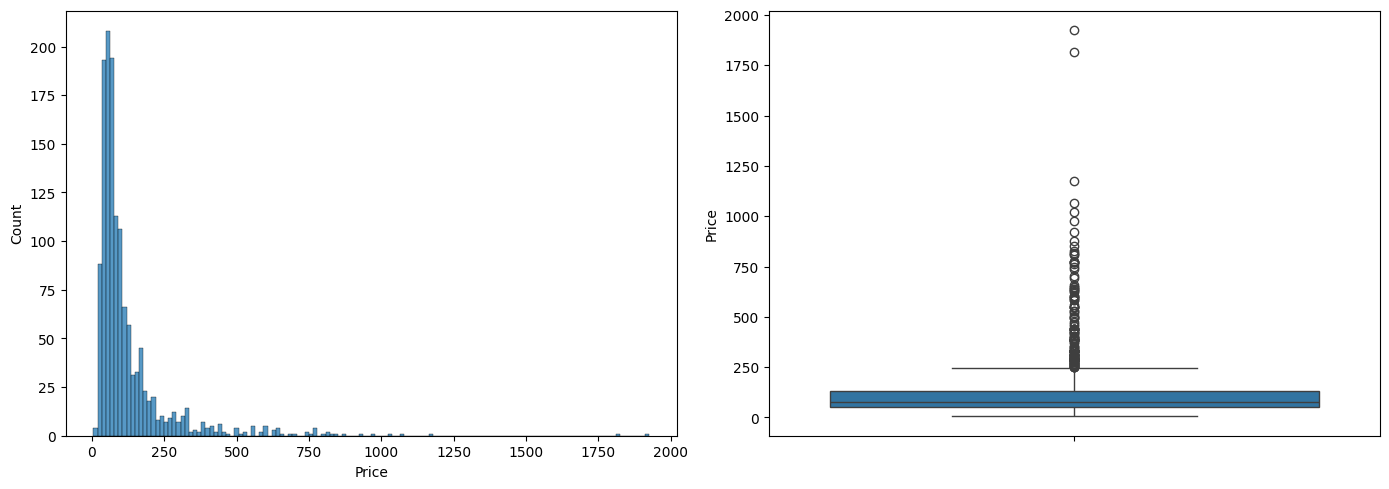

In [293]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Price'])
plt.subplot(122)
sns.boxplot(df['Price'])

plt.tight_layout()
plt.show()

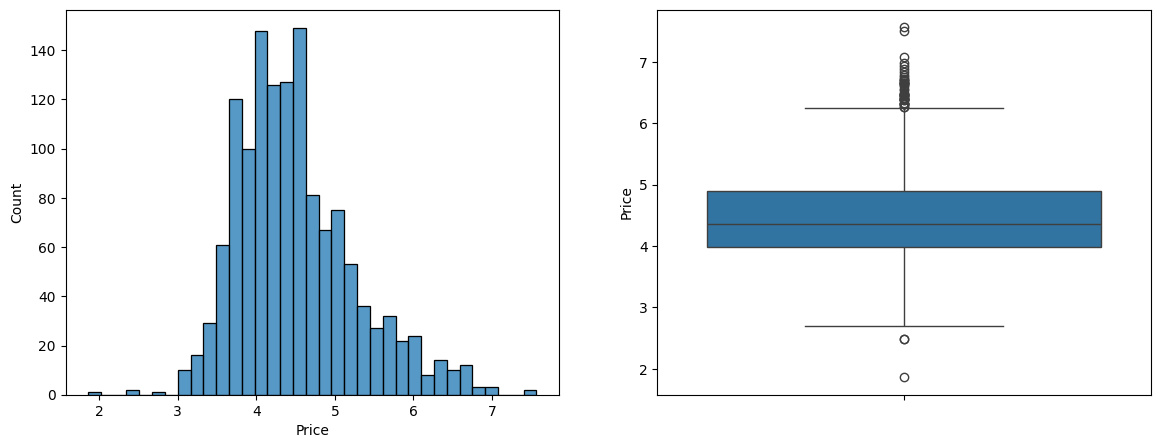

In [294]:
# Applying log transformation on Price to reduce outliers effect

plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(np.log1p(df['Price']))

plt.subplot(122)
sns.boxplot(np.log1p(df['Price']))

plt.show()

In [295]:
# Adding log of the Price column to the dataset.
df['Price_log'] = np.log1p(df['Price'])

# Calculating Z-scores
z_scores = np.abs(stats.zscore(df['Price_log']))

# Filtering out rows with Z-scores >= 3
df = df[(z_scores < 3)]

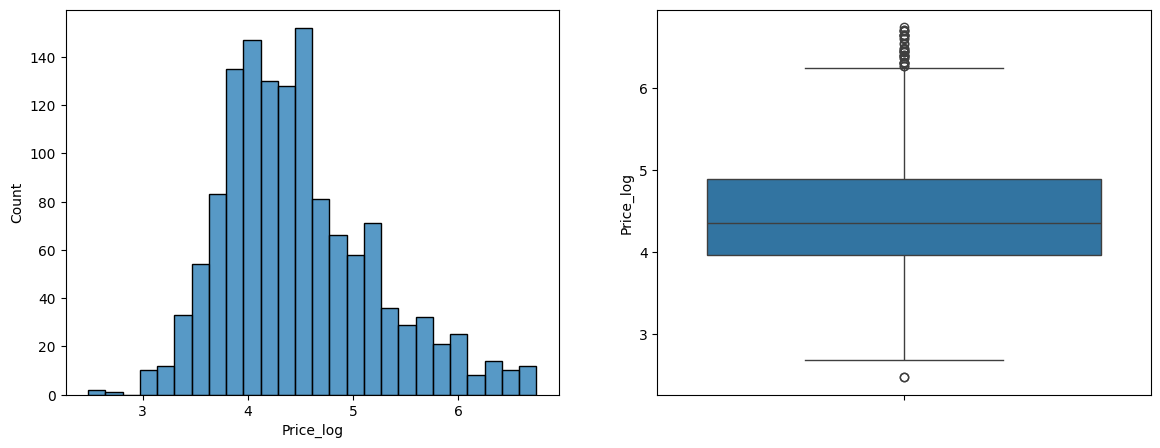

In [296]:
# Taking a look after filtering out some rows

plt.figure(figsize=(14,5))

plt.subplot(121)
sns.histplot(df['Price_log'])

plt.subplot(122)
sns.boxplot(df['Price_log'])

plt.show()

In [297]:
# Changing column names.

df.rename(columns={'Battery capacity (mAh)' : 'Battery capacity',
                  'Internal storage (GB)': 'Storage',
                  'Operating system': 'OS',
                  'Wi-Fi': 'Wifi',
                  'Number of SIMs': 'SIM',
                  '4G/ LTE': '4G',
                  'Screen size (inches)': 'Screen size'}, inplace=True)

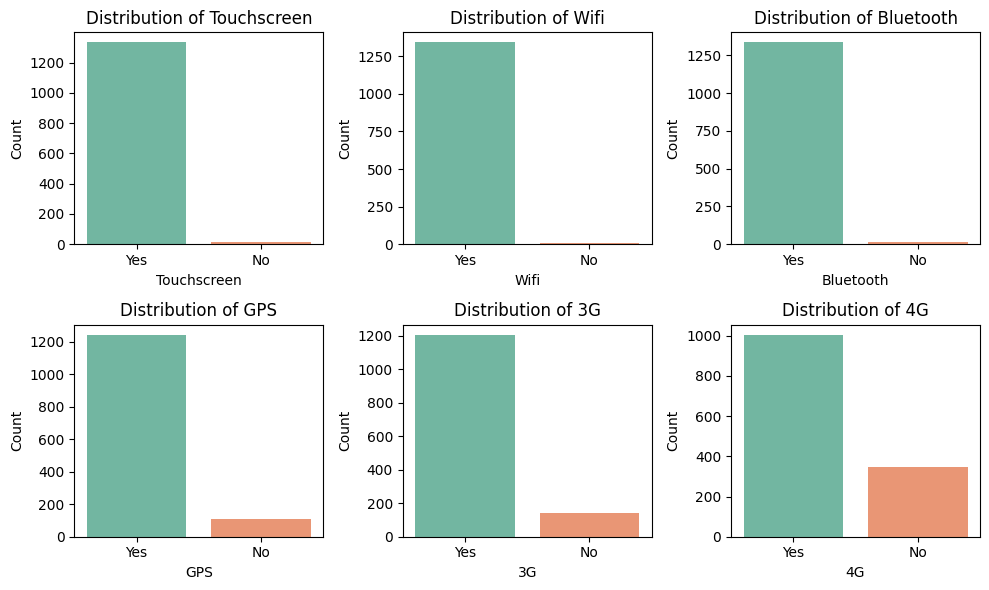

In [298]:
# Plotting a list of categorical columns
columns = ['Touchscreen', 'Wifi', 'Bluetooth', 'GPS', '3G', '4G']

plt.figure(figsize=(10, 6))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [299]:
# Dropping the list of categorical columns except 4G

df = df.drop(columns=[col for col in columns if col not in '4G'], axis=1)

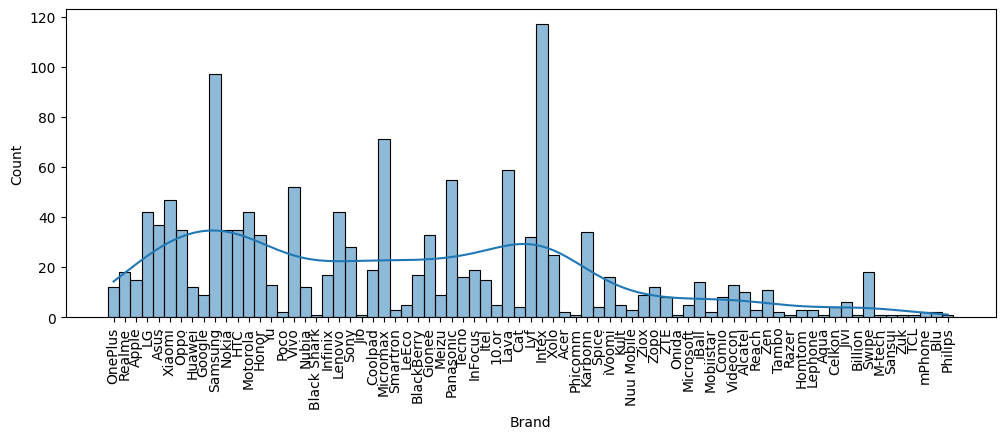

In [300]:
# Displaying Brand distributions

plt.figure(figsize=(12,4))
sns.histplot(df['Brand'], kde=True)
plt.xticks(rotation=90)
plt.show()

In [301]:
# Đưa các brand có dưới 10 sản phẩm vào phân loại Other.

threshold = 10
brand_counts = df['Brand'].value_counts()
rare_brands = brand_counts[brand_counts <= threshold].index
df['Brand'] = df['Brand'].apply(lambda x: 'Other' if x in rare_brands else x)

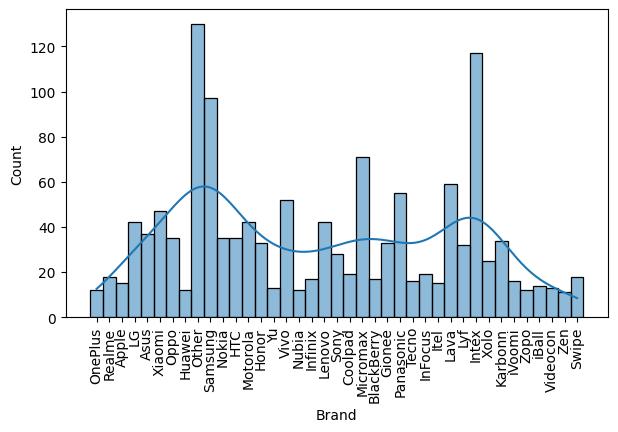

In [302]:
# Vẽ đồ thị Brand sau khi đổi.

plt.figure(figsize=(7,4))
sns.histplot(df['Brand'], kde=True)
plt.xticks(rotation=90)
plt.show()

In [303]:
df['SIM'].value_counts()

,count
SIM,
2,1124
1,225
3,1


Chỉ có một thiết bị hỗ trợ 3 SIM. Nó không đủ để phân biệt về giá đối với thiết bị có 3 sim. Nó không thuộc phạm vi của project này.

In [304]:
df[df['SIM'] == 3]

,Brand,Battery capacity,Screen size,Resolution x,Resolution y,Processor,Storage,Rear camera,Front camera,OS,SIM,4G,Price,RAM,Price_log
508,Coolpad,3050,5.5,720,1080,4,16.0,8.0,8.0,Android,3,Yes,50.49,2.0,3.941388


In [305]:
# loại bỏ thiết bị 3 sim

df = df.drop(index=508)

df = df.reset_index(drop=True)

In [306]:
# Kiểm tra OS

OS_freq = (df['OS']).value_counts()
OS_freq

,count
OS,
Android,1292
Windows,18
iOS,15
Cyanogen,10
BlackBerry,10
Tizen,3
Sailfish,1


In [307]:
def simplify_os(os):
    if os == 'iOS':
        return 'iOS'
    elif os == 'Android':
        return 'Android'
    else:
        return 'Other'

df['OSs'] = df['OS'].apply(simplify_os)


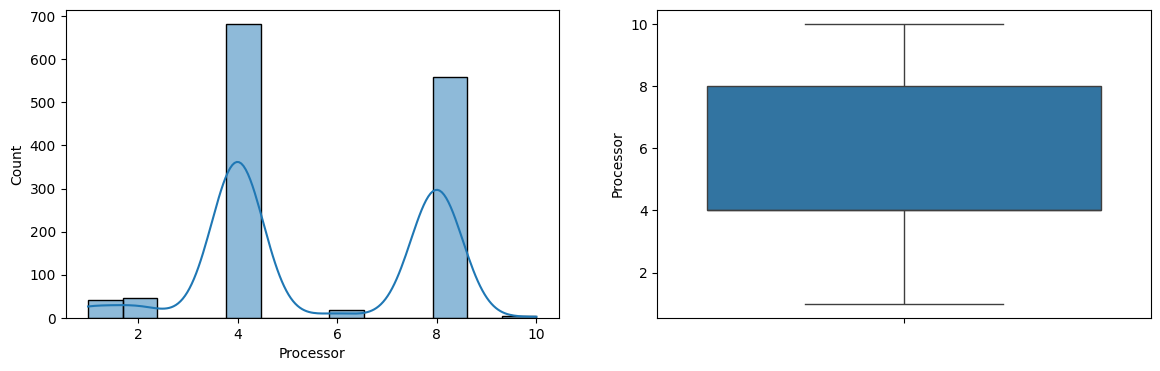

In [308]:
# Displaying `Processor` distribution

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df['Processor'], kde=True)
plt.subplot(122)
sns.boxplot(df['Processor'])
plt.show()

In [309]:
# Converting Processor column to a categorical column.

def categorize_processor(x):
    if x == 1 or x == 2:
        return '1_2'
    elif x==4 or x == 6:
        return '4_6'
    elif x > 6:
        return '8_10'

df['CPU'] = df['Processor'].apply(categorize_processor)

In [310]:
df.dtypes

,0
Brand,object
Battery capacity,int64
Screen size,float64
Resolution x,int64
Resolution y,int64
Processor,int64
Storage,float64
Rear camera,float64
Front camera,float64
OS,object


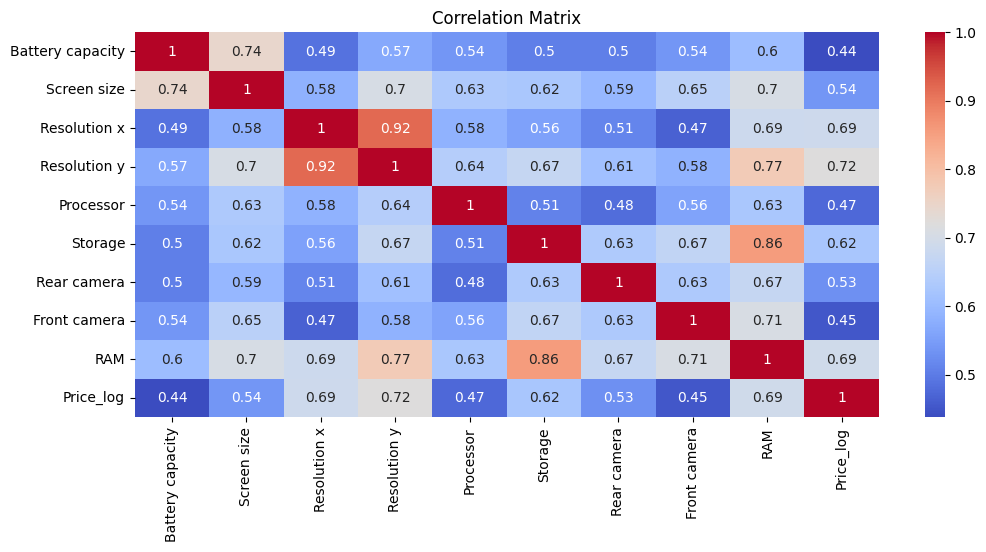

In [311]:
# Ma trận tương  quan

continuous_variables = ['Battery capacity', 'Screen size', 'Resolution x', 'Resolution y', 'Processor', 'Storage', 'Rear camera', 'Front camera','RAM', 'Price_log']

corr_df = df[continuous_variables]

corr_matrix = corr_df[continuous_variables].corr()

plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [312]:

# Converting categorical data into the proper format for modeling.

df_encoded = pd.get_dummies(df, drop_first=True, columns=['SIM', '4G', 'CPU', 'OSs'], dtype='int32')

In [313]:
df_encoded.drop(['Brand', 'Price', 'Processor', 'OS'], axis=1, inplace=True)

Chưa biết cách xử lý trường Brand.
Bỏ trường Price, chỉ giữ Price_log.

In [314]:
df_encoded.columns

Index(['Battery capacity', 'Screen size', 'Resolution x', 'Resolution y',
       'Storage', 'Rear camera', 'Front camera', 'RAM', 'Price_log', 'SIM_2',
       '4G_Yes', 'CPU_4_6', 'CPU_8_10', 'OSs_Other', 'OSs_iOS'],
      dtype='object')

In [315]:
df_encoded.to_csv('preprocessed_data.csv', index=False)

In [316]:
!ls

ndtv_data_final.csv  preprocessed_data.csv  sample_data


## Phân tích và trực quan hóa

In [317]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [318]:
# from google.colab import drive
# drive.mount('/content/drive')

In [319]:
path = 'preprocessed_data.csv'
df = pd.read_csv(path)
df.head()



,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,Price_log,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
0,4085,6.67,1440,3120,256.0,48.0,16.0,12.0,6.476939,1,1,0,1,0,0
1,4000,6.50,1080,2400,64.0,64.0,16.0,6.0,5.733306,1,1,0,1,0,0
2,3110,6.10,828,1792,64.0,12.0,12.0,4.0,6.540886,1,1,1,0,0,1
3,4000,6.40,1080,2340,128.0,12.0,32.0,6.0,6.311535,0,0,0,1,0,0
4,3800,6.55,1080,2400,128.0,48.0,16.0,8.0,5.953841,1,1,0,1,0,0


### Phân tích tham số dữ liệu

In [320]:
# brief info
print(df.info(), "\n")

# Check for missing values
print(df.isnull().sum())

# Basic stats
print(df.describe().T)

# Correlation matrix
print(df.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Battery capacity  1349 non-null   int64  
 1   Screen size       1349 non-null   float64
 2   Resolution x      1349 non-null   int64  
 3   Resolution y      1349 non-null   int64  
 4   Storage           1349 non-null   float64
 5   Rear camera       1349 non-null   float64
 6   Front camera      1349 non-null   float64
 7   RAM               1349 non-null   float64
 8   Price_log         1349 non-null   float64
 9   SIM_2             1349 non-null   int64  
 10  4G_Yes            1349 non-null   int64  
 11  CPU_4_6           1349 non-null   int64  
 12  CPU_8_10          1349 non-null   int64  
 13  OSs_Other         1349 non-null   int64  
 14  OSs_iOS           1349 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 158.2 KB
None 

Battery capacity    0
Screen size  

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Battery capacity  1349 non-null   int64  
 1   Screen size       1349 non-null   float64
 2   Resolution x      1349 non-null   int64  
 3   Resolution y      1349 non-null   int64  
 4   Storage           1349 non-null   float64
 5   Rear camera       1349 non-null   float64
 6   Front camera      1349 non-null   float64
 7   RAM               1349 non-null   float64
 8   Price_log         1349 non-null   float64
 9   SIM_2             1349 non-null   int64  
 10  4G_Yes            1349 non-null   int64  
 11  CPU_4_6           1349 non-null   int64  
 12  CPU_8_10          1349 non-null   int64  
 13  OSs_Other         1349 non-null   int64  
 14  OSs_iOS           1349 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 158.2 KB


In [322]:
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']

In [323]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Screen size,1349.0,5.283640,0.665961,2.400,5.0,5.2,5.67,7.0
Resolution x,1349.0,808.260934,268.198554,240.000,720.0,720.0,1080.00,2160.0
Resolution y,1349.0,1483.480356,550.919076,320.000,1280.0,1280.0,1920.00,3840.0
Storage,1349.0,29.814648,33.419657,0.064,8.0,16.0,32.00,256.0
Rear camera,1349.0,11.993625,8.590219,0.000,8.0,12.2,13.00,64.0
Front camera,1349.0,6.998962,6.249636,0.000,2.0,5.0,8.00,48.0
RAM,1349.0,2.458302,1.597354,0.064,1.0,2.0,3.00,12.0
Battery capacity,1349.0,2932.180875,871.867999,1010.000,2300.0,2942.0,3500.00,6000.0


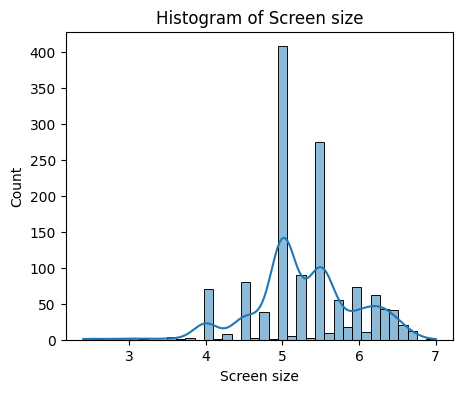

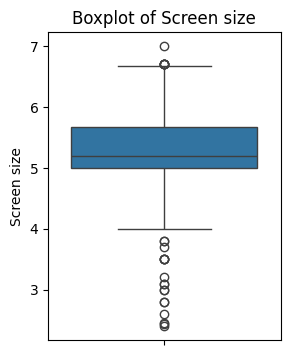

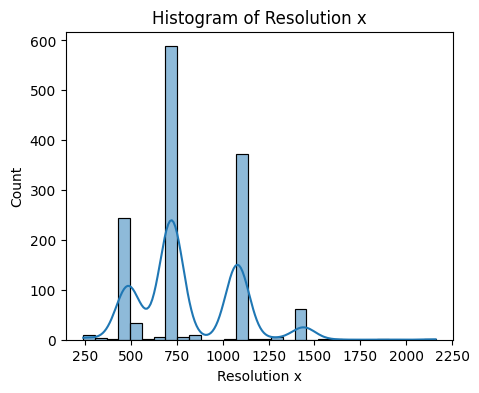

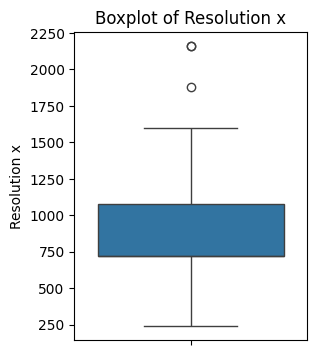

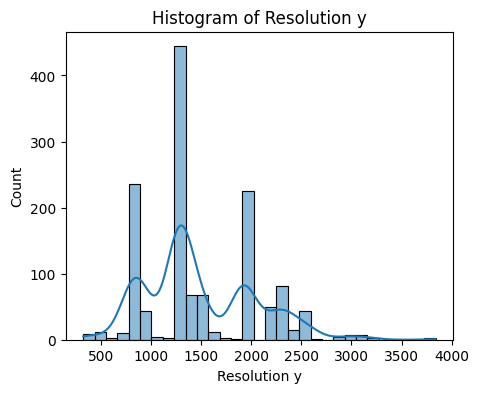

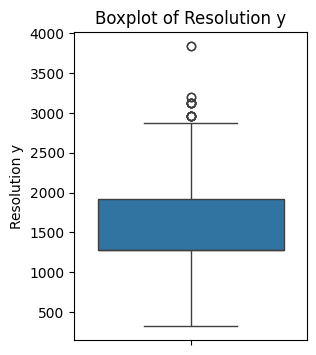

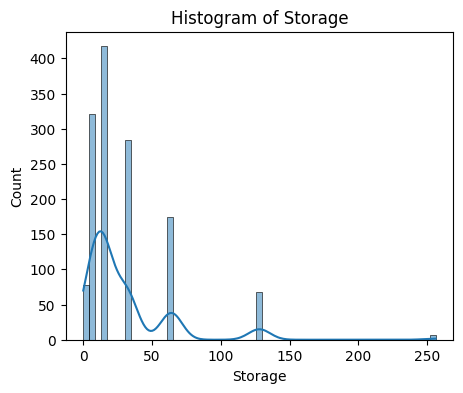

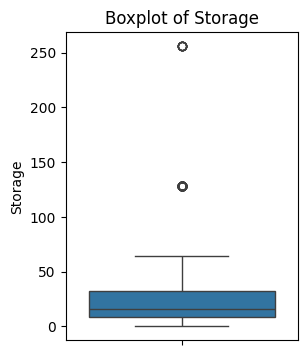

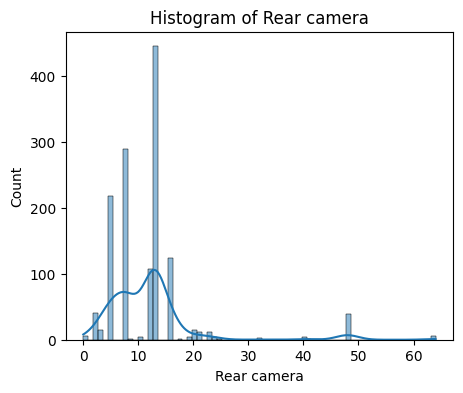

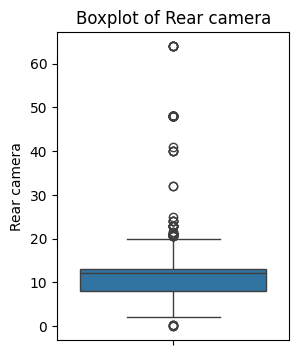

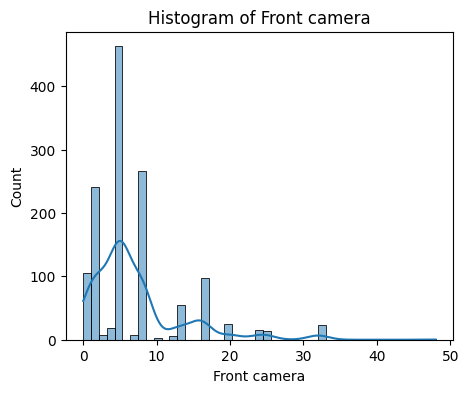

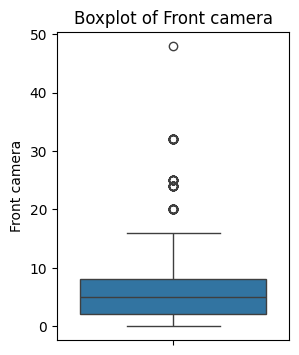

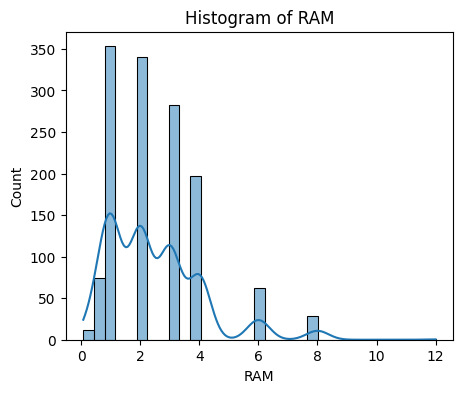

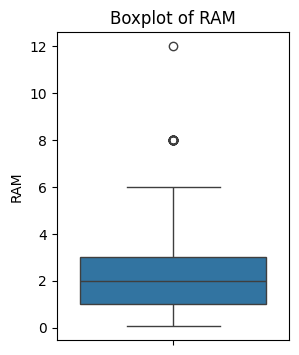

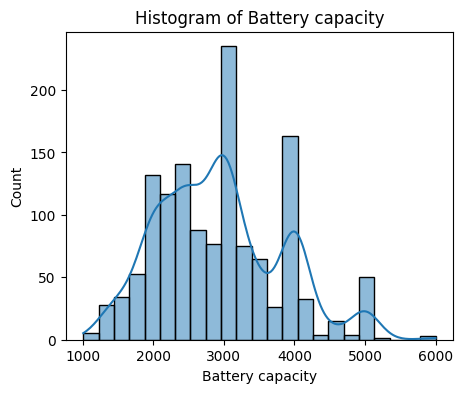

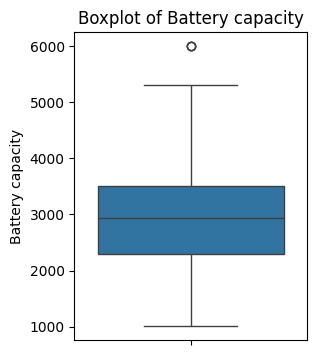

In [324]:
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(3,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Thống kê cơ bản của các biến nhị phân:


,Số lượng 1,Số lượng 0,Tỷ lệ (%)
SIM_2,1124,225,83.32
4G_Yes,1003,346,74.35
CPU_4_6,699,650,51.82
CPU_8_10,563,786,41.73
OSs_Other,42,1307,3.11
OSs_iOS,15,1334,1.11



 Mô tả chi tiết (describe):


,count,mean,std,min,25%,50%,75%,max
SIM_2,1349.0,0.833210,0.372927,0.0,1.0,1.0,1.0,1.0
4G_Yes,1349.0,0.743514,0.436855,0.0,0.0,1.0,1.0,1.0
CPU_4_6,1349.0,0.518162,0.499855,0.0,0.0,1.0,1.0,1.0
CPU_8_10,1349.0,0.417346,0.493304,0.0,0.0,0.0,1.0,1.0
OSs_Other,1349.0,0.031134,0.173745,0.0,0.0,0.0,0.0,1.0
OSs_iOS,1349.0,0.011119,0.104899,0.0,0.0,0.0,0.0,1.0


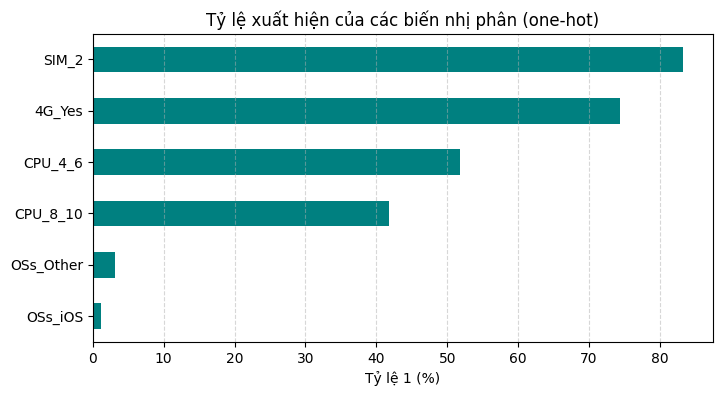

In [325]:
bin_summary = pd.DataFrame({
    'Số lượng 1': df[bin_cols].sum(),
    'Số lượng 0': len(df) - df[bin_cols].sum(),
    'Tỷ lệ (%)': (df[bin_cols].mean() * 100).round(2)
})
print("Thống kê cơ bản của các biến nhị phân:")
display(bin_summary)

# 2️⃣ Thống kê tổng hợp mô tả chi tiết hơn
print("\n Mô tả chi tiết (describe):")
display(df[bin_cols].describe().T)

# 3️⃣ Trực quan hoá tỷ lệ (tuỳ chọn)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
bin_summary['Tỷ lệ (%)'].sort_values().plot(kind='barh', color='teal')
plt.xlabel('Tỷ lệ 1 (%)')
plt.title('Tỷ lệ xuất hiện của các biến nhị phân (one-hot)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [326]:
corr_with_target = df[bin_cols + num_cols + ['Price_log']].corr()['Price_log'].sort_values(ascending=False)
print(corr_with_target)


Price_log           1.000000
Resolution y        0.720816
RAM                 0.691533
Resolution x        0.688022
Storage             0.623310
Screen size         0.537553
Rear camera         0.530092
CPU_8_10            0.468519
Front camera        0.453220
Battery capacity    0.438227
4G_Yes              0.258578
OSs_iOS             0.204406
OSs_Other           0.002422
SIM_2              -0.216211
CPU_4_6            -0.403905
Name: Price_log, dtype: float64


In [327]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df[bin_cols + num_cols + ['Price_log']].corr(), annot=False, cmap='coolwarm')
# plt.title("Correlation heatmap")
# plt.show()


### PCA method

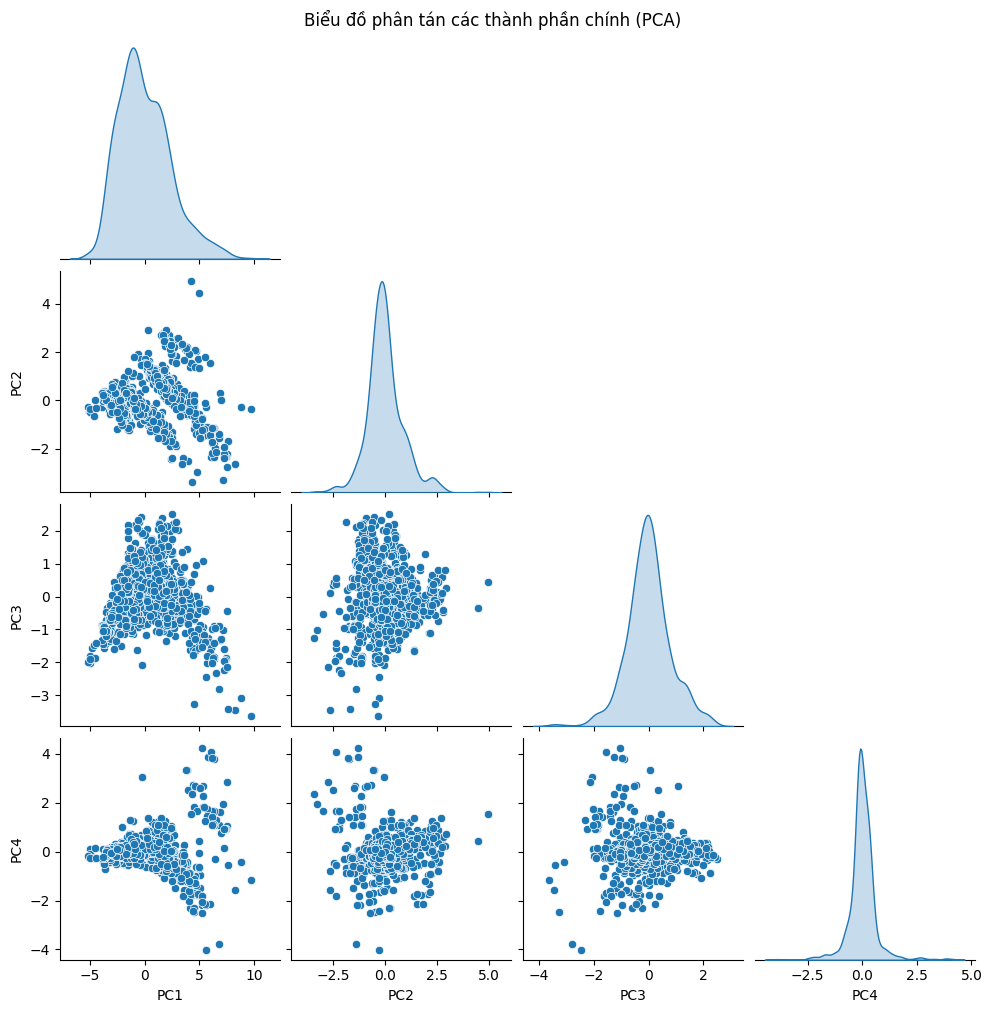

In [328]:
# Chia cột số và cột nhị phân
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
# đặc trưng X và Y
X = df.drop(columns=['Price_log'])
y = df['Price_log']

# Chuẩn hóa dữ liệu (chỉ trên các biến số)
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_cols])
# Ghép lại dữ liệu: cột số đã chuẩn hóa + cột nhị phân giữ nguyên
X_scaled = np.concatenate([X_num_scaled, X[bin_cols].values], axis=1)
X_scaled = pd.DataFrame(X_scaled, columns=num_cols + bin_cols)

# PCA: 6 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(4)])
pca_df['Price_log'] = y.values
# Visualization
sns.pairplot(pca_df, vars=['PC1','PC2','PC3','PC4'], hue=None, diag_kind='kde', corner=True)
plt.suptitle('Biểu đồ phân tán các thành phần chính (PCA)', y=1.01)
plt.show()

phương sai giải thích của từng thành phần (PCA): [0.64043672 0.08540637 0.07312136 0.04609535]
tổng phương sai tích lũy (PCA): 0.8450598050872078


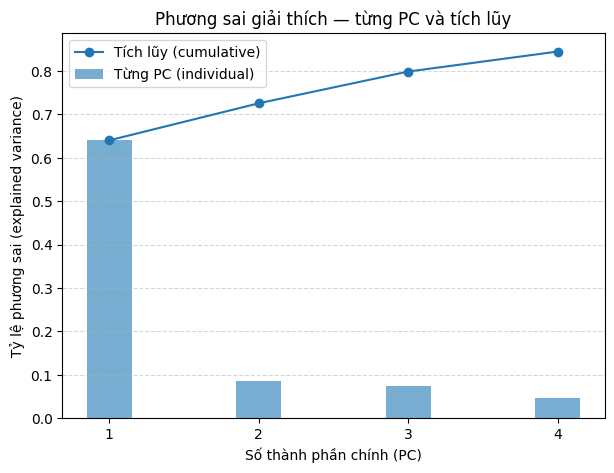

In [329]:
# Xác định lượng thông tin bảo tồn
expl_var_pca = pca.explained_variance_ratio_
print("phương sai giải thích của từng thành phần (PCA):", expl_var_pca)
print("tổng phương sai tích lũy (PCA):", sum(expl_var_pca))

pcs = np.arange(1, len(expl_var_pca)+1)

plt.figure(figsize=(7,5))
plt.plot(pcs, np.cumsum(expl_var_pca), marker='o', label='Tích lũy (cumulative)')
plt.bar(pcs, expl_var_pca, width=0.3, alpha=0.6, label='Từng PC (individual)')
plt.xticks(pcs)
plt.xlabel('Số thành phần chính (PC)')
plt.ylabel('Tỷ lệ phương sai (explained variance)')
plt.title('Phương sai giải thích — từng PC và tích lũy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

- 4 thành phần đầu giữ lại khoảng 84,5% thông tin so với toàn bộ dữ liệu gốc.
- Thành phần chính đầu giữ 64.04%, thứ hai chiếm 8,54%...

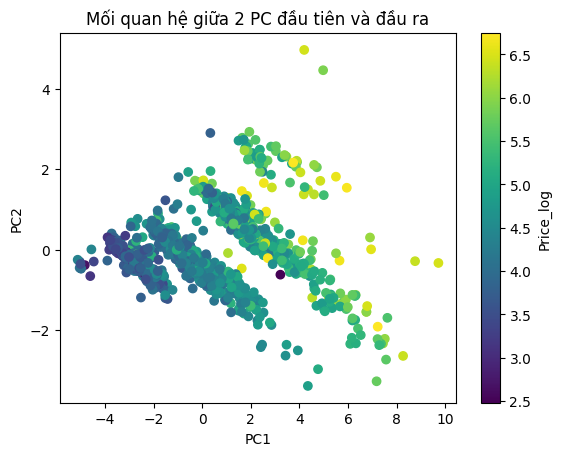

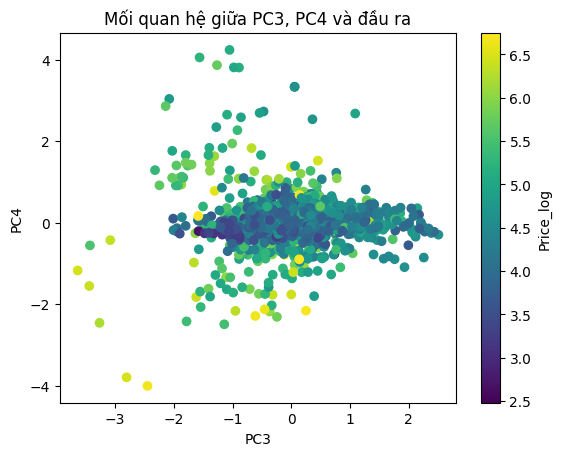

In [330]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis')
plt.colorbar(label='Price_log')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Mối quan hệ giữa 2 PC đầu tiên và đầu ra')
plt.show()

plt.scatter(pca_df['PC3'], pca_df['PC4'], c=y, cmap='viridis')
plt.colorbar(label='Price_log')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Mối quan hệ giữa PC3, PC4 và đầu ra')
plt.show()



### LDA method

In [331]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Chia thành 5 nhóm theo phân vị
y_cat = pd.qcut(y, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
lda = LDA(n_components=4)
X_lda = lda.fit_transform(X_scaled, y_cat)

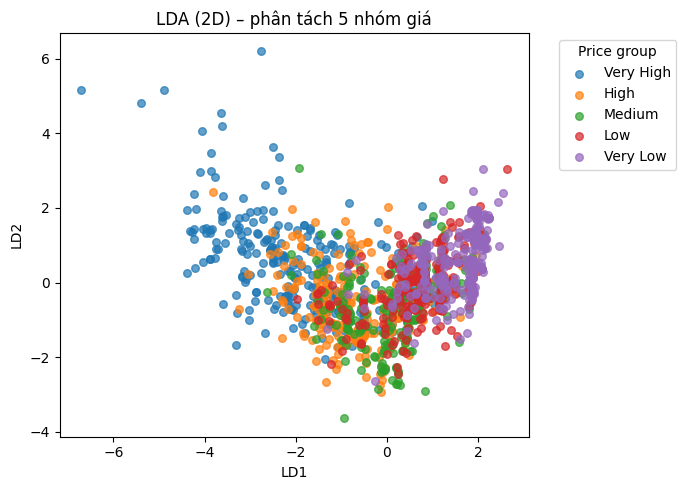

In [332]:
X_lda2 = X_lda[:, :2]

plt.figure(figsize=(7,5))
for c in y_cat.unique():
    idx = (y_cat == c)
    plt.scatter(X_lda2[idx, 0], X_lda2[idx, 1], s=30, label=str(c), alpha=0.7)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA (2D) – phân tách 5 nhóm giá')
plt.legend(title='Price group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


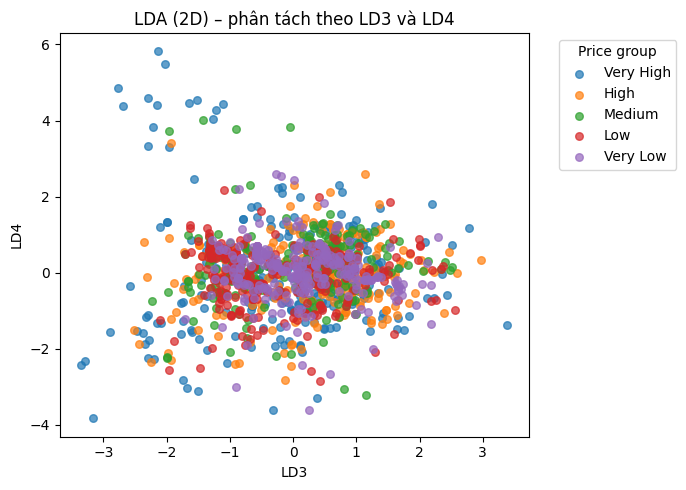

In [333]:
X_lda34 = X_lda[:, 2:4]   # Lấy LD3 và LD4

plt.figure(figsize=(7,5))
for c in y_cat.unique():
    idx = (y_cat == c)
    plt.scatter(X_lda34[idx, 0], X_lda34[idx, 1], s=30, label=str(c), alpha=0.7)

plt.xlabel('LD3')
plt.ylabel('LD4')
plt.title('LDA (2D) – phân tách theo LD3 và LD4')
plt.legend(title='Price group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


LDA chỉ hoạt động khi đầu ra là biến phân loại (categorical), không phải giá trị liên tục.
Vì Price_log là đầu ra liên tục, ta cần phân nhóm giá để LDA có thể dùng được

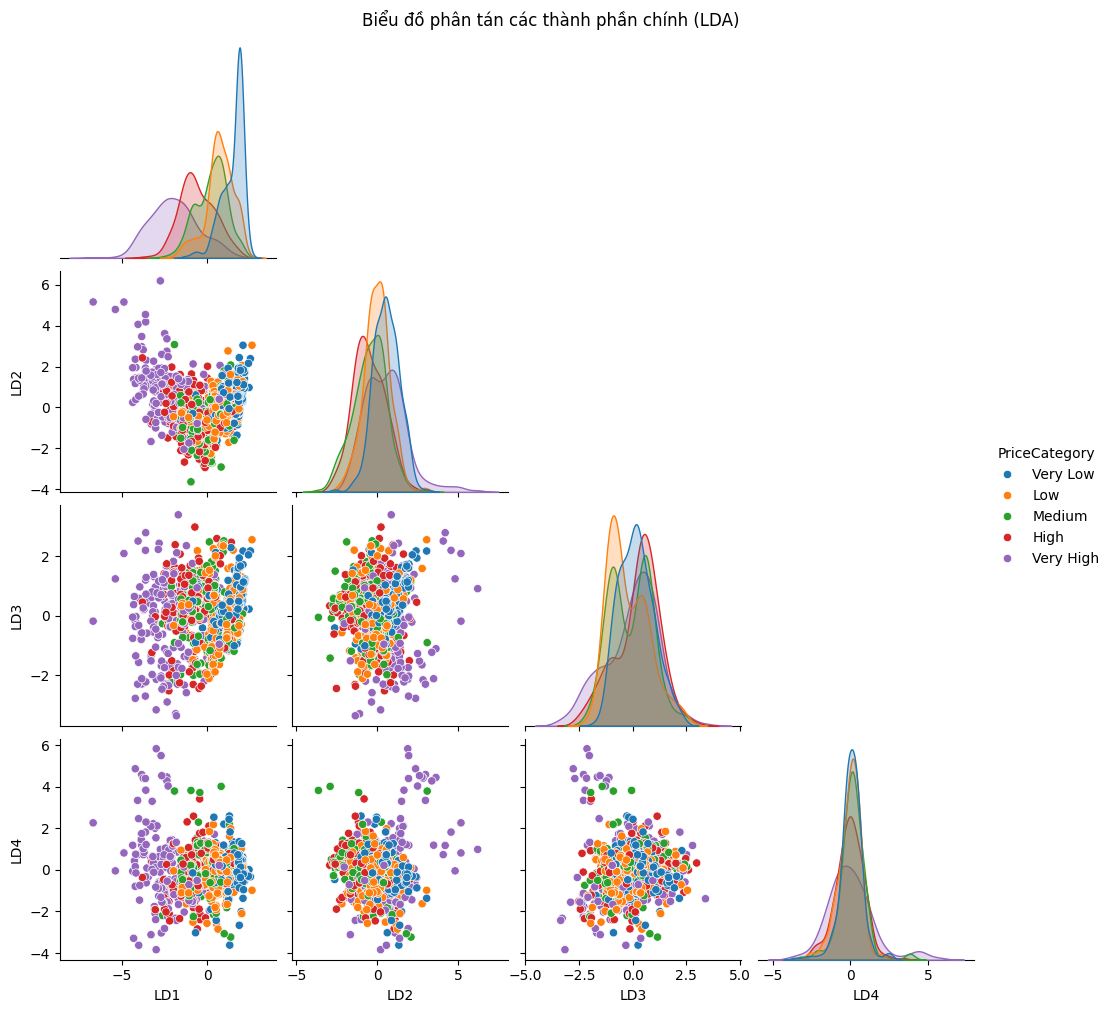

In [334]:
lda_df = pd.DataFrame(X_lda, columns=[f'LD{i+1}' for i in range(4)])
lda_df['PriceCategory'] = y_cat
lda_df['Price_log'] = y.values
# Visualization
sns.pairplot(lda_df, vars=['LD1','LD2','LD3','LD4'], hue='PriceCategory', diag_kind='kde', corner=True)
plt.suptitle('Biểu đồ phân tán các thành phần chính (LDA)', y=1.01)
plt.show()

Khả năng tách phân lớp của từng thành phần (LDA): [0.8530557  0.1267787  0.01700661 0.003159  ]
Tổng khả năng tách phân lớp (LDA): 0.9999999999999999


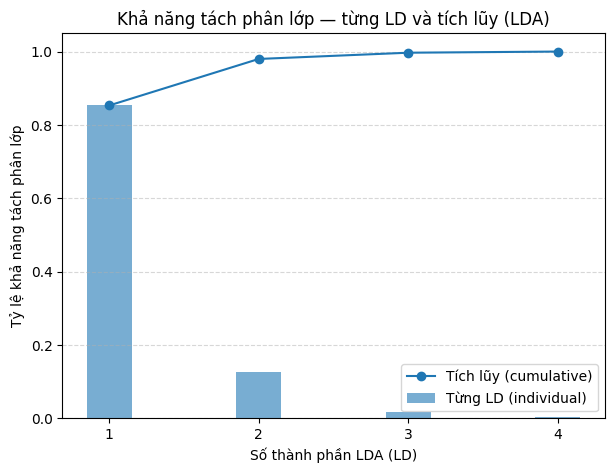

In [335]:
expl_var_lda = lda.explained_variance_ratio_
print("Khả năng tách phân lớp của từng thành phần (LDA):", expl_var_lda)
print("Tổng khả năng tách phân lớp (LDA):", sum(expl_var_lda))

# visualization
lds = np.arange(1, len(expl_var_lda) + 1)
plt.figure(figsize=(7,5))
plt.plot(lds, np.cumsum(expl_var_lda), marker='o', label='Tích lũy (cumulative)')
plt.bar(lds, expl_var_lda, width=0.3, alpha=0.6, label='Từng LD (individual)')
plt.xticks(lds)
plt.xlabel('Số thành phần LDA (LD)')
plt.ylabel('Tỷ lệ khả năng tách phân lớp')
plt.title('Khả năng tách phân lớp — từng LD và tích lũy (LDA)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

gần như toàn bộ "sức mạnh" phân loại của mô hình nằm ở hai thành phần đầu tiên (LD1 và LD2), chiếm tới 98% (85.3% + 12.7%) khả năng phân tách.

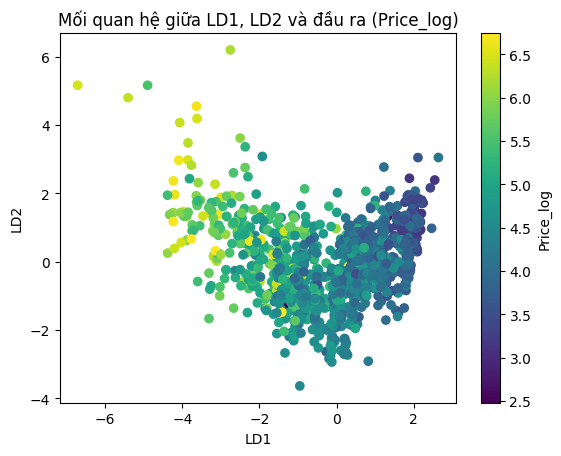

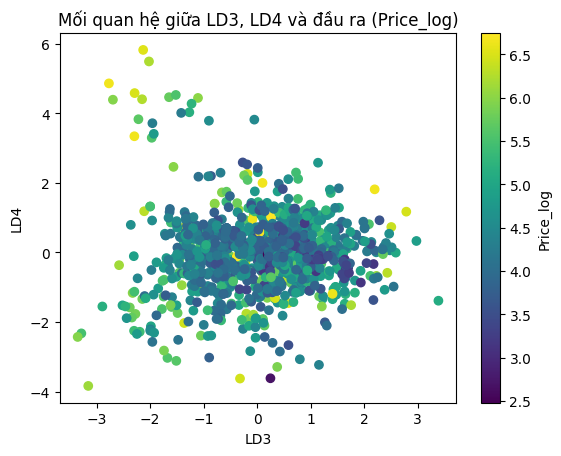

In [336]:
# Trực quan hóa mối quan hệ giữa các thành phần LDA và đầu ra
plt.scatter(lda_df['LD1'], lda_df['LD2'], c=lda_df['Price_log'], cmap='viridis')
plt.colorbar(label='Price_log')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Mối quan hệ giữa LD1, LD2 và đầu ra (Price_log)')
plt.show()

plt.scatter(lda_df['LD3'], lda_df['LD4'], c=lda_df['Price_log'], cmap='viridis')
plt.colorbar(label='Price_log')
plt.xlabel('LD3')
plt.ylabel('LD4')
plt.title('Mối quan hệ giữa LD3, LD4 và đầu ra (Price_log)')
plt.show()

## KNN


### Tải dữ liệu

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [338]:
import warnings
warnings.filterwarnings('ignore')

In [339]:
# from google.colab import drive
# drive.mount('/content/drive')

In [340]:
path = 'preprocessed_data.csv'
df = pd.read_csv(path)
df.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,Price_log,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
0,4085,6.67,1440,3120,256.0,48.0,16.0,12.0,6.476939,1,1,0,1,0,0
1,4000,6.50,1080,2400,64.0,64.0,16.0,6.0,5.733306,1,1,0,1,0,0
2,3110,6.10,828,1792,64.0,12.0,12.0,4.0,6.540886,1,1,1,0,0,1
3,4000,6.40,1080,2340,128.0,12.0,32.0,6.0,6.311535,0,0,0,1,0,0
4,3800,6.55,1080,2400,128.0,48.0,16.0,8.0,5.953841,1,1,0,1,0,0


In [341]:
df.columns

Index(['Battery capacity', 'Screen size', 'Resolution x', 'Resolution y',
       'Storage', 'Rear camera', 'Front camera', 'RAM', 'Price_log', 'SIM_2',
       '4G_Yes', 'CPU_4_6', 'CPU_8_10', 'OSs_Other', 'OSs_iOS'],
      dtype='object')

In [342]:
df.describe()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,Price_log,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2932.180875,5.283640,808.260934,1483.480356,29.814648,11.993625,6.998962,2.458302,4.483892,0.833210,0.743514,0.518162,0.417346,0.031134,0.011119
std,871.867999,0.665961,268.198554,550.919076,33.419657,8.590219,6.249636,1.597354,0.725734,0.372927,0.436855,0.499855,0.493304,0.173745,0.104899
min,1010.000000,2.400000,240.000000,320.000000,0.064000,0.000000,0.000000,0.064000,2.479391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2300.000000,5.000000,720.000000,1280.000000,8.000000,8.000000,2.000000,1.000000,3.974998,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2942.000000,5.200000,720.000000,1280.000000,16.000000,12.200000,5.000000,2.000000,4.356568,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3500.000000,5.670000,1080.000000,1920.000000,32.000000,13.000000,8.000000,3.000000,4.890266,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,6000.000000,7.000000,2160.000000,3840.000000,256.000000,64.000000,48.000000,12.000000,6.746752,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [343]:
# Selecting categorical and numerical columns to scale
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10', 'OSs_Other', 'OSs_iOS']

num_cols = ['Battery capacity', 'Screen size', 'Resolution x', 'Resolution y',
       'Storage', 'Rear camera', 'Front camera', 'RAM']

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [345]:
y = df['Price_log']
X = df.drop('Price_log', axis=1)

### Làm với dữ liệu gốc

#### train:validation = 4:1

In [346]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=42
)

In [347]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [348]:
X_train.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
755,-0.849796,-0.423373,-0.327058,-0.364635,-0.671803,-0.802510,-0.799026,-0.923290,0,0,1,0,0,0
109,0.973484,1.509278,1.016567,1.331645,3.005054,1.370696,2.673564,2.216332,1,1,0,1,0,0
1040,-1.647481,-1.910027,-1.222808,-1.230821,-0.671803,-0.802510,-1.067363,-0.923290,1,1,1,0,1,0
548,-1.020728,-0.720703,-0.327058,-0.364635,-0.426679,-0.459372,-0.325491,-0.923290,0,0,0,1,0,0
1341,-1.020728,-0.423373,-0.327058,-0.364635,-0.426679,0.112524,-0.325491,-0.295366,1,0,0,1,0,0


In [349]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 9
Điểm R² trung bình (CV): 0.5975018119520762


In [350]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [351]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.24077367825759435
MAE test:  0.36553067291219526
R2 test:  0.578338753360167

MSE train:  0.16049516013963497
MAE train:  0.2971119275465267
R2 train:  0.6884239118247002


In [352]:
residuals = y_test - y_test_pred

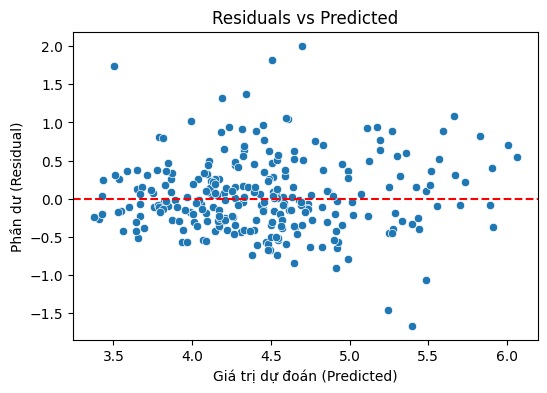

In [353]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Giá trị dự đoán (Predicted)")
plt.ylabel("Phần dư (Residual)")
plt.title("Residuals vs Predicted")
plt.show()

#### train:validation = 7:3

In [354]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.3,
  random_state=42
)

In [355]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [356]:
X_train.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
12,1.268199,1.930373,1.019011,1.541668,2.895170,4.025545,1.385311,2.171656,1,1,0,1,0,0
538,-0.169957,-0.435619,-0.330626,-0.366696,-0.436787,-0.464339,-0.792301,-0.304942,0,1,0,0,1,0
171,0.057420,-0.139870,1.019011,0.785524,0.991195,1.219368,0.918680,0.933357,1,1,0,1,0,0
596,0.057420,-0.435619,-0.330626,-0.366696,-0.436787,-0.464339,-0.325670,-0.304942,1,1,1,0,0,0
1237,-0.852086,-0.435619,-0.330626,-0.366696,-0.674784,-0.464339,-0.325670,-0.924092,1,0,0,1,0,0


In [357]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 7
Điểm R² trung bình (CV): 0.5900111685282919


In [358]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [359]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.21567929955552015
MAE test:  0.34593043726264705
R2 test:  0.5895469230624789

MSE train:  0.15649149306192947
MAE train:  0.2932921174095299
R2 train:  0.7026173536793072


#### train:validation = 6:4

In [360]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.4,
  random_state=42
)

In [361]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [362]:
X_train.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
561,-0.515191,-0.436923,-1.013907,-0.955511,-0.684736,-0.808761,-0.936629,-0.938496,0,0,0,0,1,0
27,2.340582,1.033951,0.966728,1.180575,0.039392,0.088661,0.143141,0.298056,1,1,0,1,0,0
941,-1.086346,-1.179788,-1.233978,-1.144199,-0.684736,-0.808761,-0.795789,-0.938496,1,0,1,0,0,0
708,0.398656,1.345955,0.966728,1.180575,0.039392,0.425194,-0.326324,0.298056,0,0,0,1,0,0
554,-1.200577,-0.436923,-1.013907,-0.955511,-0.684736,-0.472228,-0.795789,-0.938496,1,0,0,1,0,0


In [363]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 15
Điểm R² trung bình (CV): 0.5710924345717052


In [364]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [365]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.21961845296018395
MAE test:  0.34407219164830816
R2 test:  0.5900050891946789

MSE train:  0.1872313310714976
MAE train:  0.31888441392211453
R2 train:  0.6399131441103805


bảng 1 : mỗi phương pháp từng train test split


### Làm với dữ liệu giảm chiều

#### Giảm còn 6 chiều

##### train:validation = 4:1

In [366]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=42
)

In [367]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [368]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [369]:
# X_train.head()

In [370]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 14
Điểm R² trung bình (CV): 0.5791723517339129


In [371]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [372]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.24426037450033075
MAE test:  0.3731746608742053
R2 test:  0.5722325847166256

MSE train:  0.18270374248928212
MAE train:  0.3150841266190819
R2 train:  0.6453094452800283


##### train:validation = 7:3

In [373]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.3,
  random_state=42
)

In [374]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [375]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [376]:
# X_train.head()

In [377]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 18
Điểm R² trung bình (CV): 0.5794933856110674


In [378]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [379]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.2130634420086344
MAE test:  0.350440278870181
R2 test:  0.5945250863872031

MSE train:  0.19532190057494747
MAE train:  0.32341154753219004
R2 train:  0.6288274682485226


##### train:validation = 6:4

In [380]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.4,
  random_state=42
)

In [381]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [382]:
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [383]:
# X_train.head()

In [384]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 18
Điểm R² trung bình (CV): 0.567058151220458


In [385]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [386]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.2233527739776827
MAE test:  0.351076852260801
R2 test:  0.583033668570177

MSE train:  0.19475170719947793
MAE train:  0.3248108052455151
R2 train:  0.6254498137503688


#### Giảm còn 4 chiều

##### train:validation = 4:1

In [387]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.2,
  random_state=42
)

In [388]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [389]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [390]:
# X_train.head()

In [391]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 10
Điểm R² trung bình (CV): 0.5608822930726729


In [392]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [393]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.23639073947446776
MAE test:  0.37407619639320017
R2 test:  0.5860144903618754

MSE train:  0.1807928746295454
MAE train:  0.3116113194999975
R2 train:  0.6490190944198446


##### train:validation = 7:3

In [394]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.3,
  random_state=42
)

In [395]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [396]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [397]:
# X_train.head()

In [398]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 19
Điểm R² trung bình (CV): 0.5595709219719847


In [399]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [400]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.22639578041685082
MAE test:  0.3620328248271408
R2 test:  0.5691526962982969

MSE train:  0.20286566153714541
MAE train:  0.33049566662264596
R2 train:  0.6144919695306378


##### train:validation = 6:4

In [401]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.4,
  random_state=42
)

In [402]:
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train[num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test[num_cols])


In [403]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [404]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 51)
}

grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']

print("K tối ưu:", best_k)
print("Điểm R² trung bình (CV):", grid_search.best_score_)


K tối ưu: 25
Điểm R² trung bình (CV): 0.5586402151127381


In [405]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

In [406]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE test: ', mse_test)
print('MAE test: ', mae_test)
print('R2 test: ', r2_test)
print()
print('MSE train: ', mse_train)
print('MAE train: ', mae_train)
print('R2 train: ', r2_train)

MSE test:  0.23727260619181298
MAE test:  0.3613613222576483
R2 test:  0.55704741700464

MSE train:  0.20776670886885173
MAE train:  0.33564787236306115
R2 train:  0.6004191150756191


## Linear Regression

### lấy dữ liệu

In [407]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [408]:
# from google.colab import drive
# drive.mount('/content/drive')


In [409]:
path = 'preprocessed_data.csv'
df = pd.read_csv(path)
df.head()

,Battery capacity,Screen size,Resolution x,Resolution y,Storage,Rear camera,Front camera,RAM,Price_log,SIM_2,4G_Yes,CPU_4_6,CPU_8_10,OSs_Other,OSs_iOS
0,4085,6.67,1440,3120,256.0,48.0,16.0,12.0,6.476939,1,1,0,1,0,0
1,4000,6.50,1080,2400,64.0,64.0,16.0,6.0,5.733306,1,1,0,1,0,0
2,3110,6.10,828,1792,64.0,12.0,12.0,4.0,6.540886,1,1,1,0,0,1
3,4000,6.40,1080,2340,128.0,12.0,32.0,6.0,6.311535,0,0,0,1,0,0
4,3800,6.55,1080,2400,128.0,48.0,16.0,8.0,5.953841,1,1,0,1,0,0


#### dữ liệu dùng chung cho tất cả các kịch bản

In [410]:
X = df.drop('Price_log', axis = 1)
y = df['Price_log']

### 1. Thực hiện trên dữ liệu gốc


#### train:test = 4:1

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# chuẩn hóa dữ liệu(lưu ý chỉ chuẩn hóa các cột dữ liệu liên tục)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Ghép lại các cột nhị phân không chuẩn hóa
X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg2 = LinearRegression(fit_intercept=False)

lin_reg1.fit(X_train_scaled, y_train)
lin_reg2.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_train1 = lin_reg1.predict(X_train_scaled)
y_pred_test1 = lin_reg1.predict(X_test_scaled)
y_pred_train2 = lin_reg2.predict(X_train_scaled)
y_pred_test2 = lin_reg2.predict(X_test_scaled)

# Đánh giá
print("MÔ HÌNH 1: có hệ số chệch bias")
print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))

print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(num_cols + bin_cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")

print("\n\nMÔ HÌNH 2: không có hệ số chệch bias")
print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train2))
print("R2:", r2_score(y_train, y_pred_train2))
print("MAE:", mean_absolute_error(y_train, y_pred_train2))

print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test2))
print("R2:", r2_score(y_test, y_pred_test2))
print("MAE:", mean_absolute_error(y_test, y_pred_test2))



MÔ HÌNH 1: có hệ số chệch bias
Hiệu suất trên tập TRAIN:
MSE: 0.18805677562312123
R2: 0.6349173741280805
MAE: 0.3237775129148946

Hiệu suất trên tập TEST:
MSE: 0.2208989147614652
R2: 0.6131449564845957
MAE: 0.35710461273058447

Các hệ số (β) của mô hình:
β0 (intercept): 4.61232474724975
β (Screen size): 0.019875918950532052
β (Resolution x): 0.15717286118851995
β (Resolution y): 0.12903052423928316
β (Storage): 0.08717646563782043
β (Rear camera): 0.05369115670718569
β (Front camera): -0.06900210325973367
β (RAM): 0.2061549199216735
β (Battery capacity): 0.014477982749928411
β (SIM_2): -0.17632675953083432
β (4G_Yes): 0.0007334914161293768
β (CPU_4_6): -0.008474854420119068
β (CPU_8_10): 0.000996139060245066
β (OSs_Other): 0.3119541955380168
β (OSs_iOS): 1.2360633355075294


MÔ HÌNH 2: không có hệ số chệch bias
Hiệu suất trên tập TRAIN:
MSE: 1.0086320476164707
R2: -0.9581003410393394
MAE: 0.6600951739554894

Hiệu suất trên tập TEST:
MSE: 0.902410880841085
R2: -0.5803708268713121
MAE: 0

#### train:test = 7:3

MÔ HÌNH 1: có hệ số chệch bias
Hiệu suất trên tập TRAIN:
MSE: 0.1942602634158378
R2: 0.6308449099741471
MAE: 0.32791907770854695

Hiệu suất trên tập TEST:
MSE: 0.1964407858518389
R2: 0.6261591856284926
MAE: 0.3390689532561915

Các hệ số (β) của mô hình:
β0 (intercept): 4.63470187064533
β (Screen size): 0.012623180173075382
β (Resolution x): 0.14541923416423286
β (Resolution y): 0.14922703828989853
β (Storage): 0.07893077629520193
β (Rear camera): 0.05342052314340713
β (Front camera): -0.06655036657633291
β (RAM): 0.20786888555852107
β (Battery capacity): 0.013382223072074317
β (SIM_2): -0.18727709105233575
β (4G_Yes): 0.016123080676400524
β (CPU_4_6): -0.020549208608729146
β (CPU_8_10): -0.012244934533872917
β (OSs_Other): 0.28913523887362813
β (OSs_iOS): 1.255544997972217
Index(['Screen size', 'Resolution x', 'Resolution y', 'Storage', 'Rear camera',
       'Front camera', 'RAM', 'Battery capacity', 'SIM_2', '4G_Yes', 'CPU_4_6',
       'CPU_8_10', 'OSs_Other', 'OSs_iOS'],
      dtype=

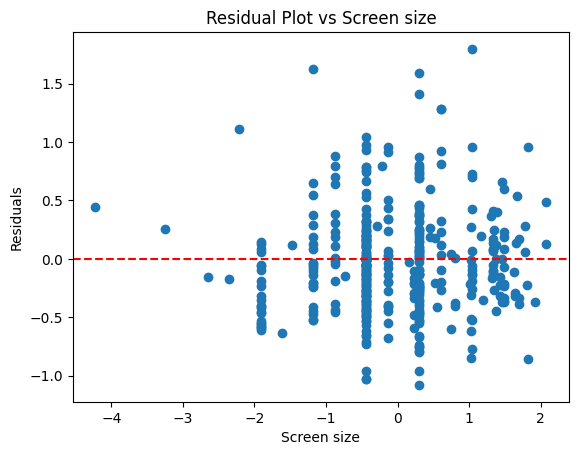

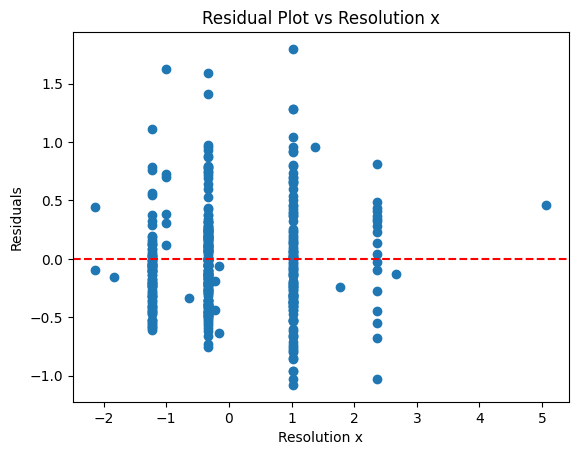

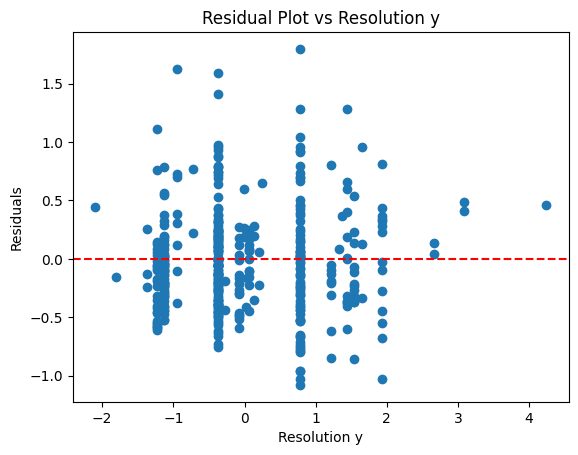

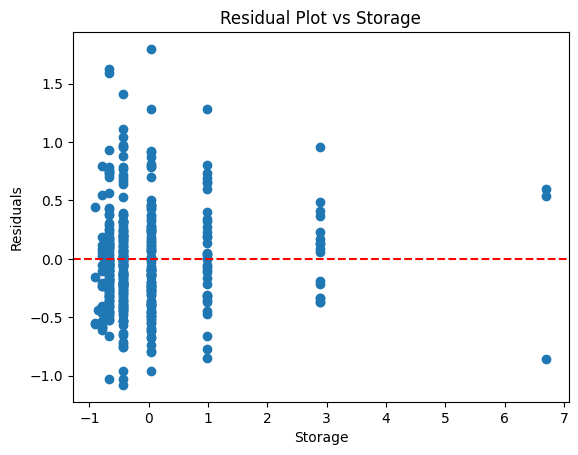

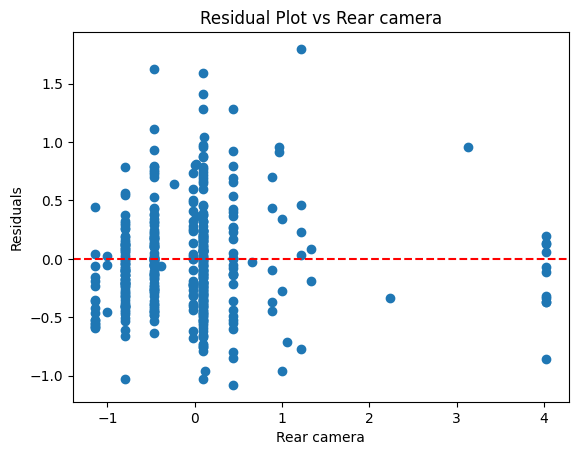

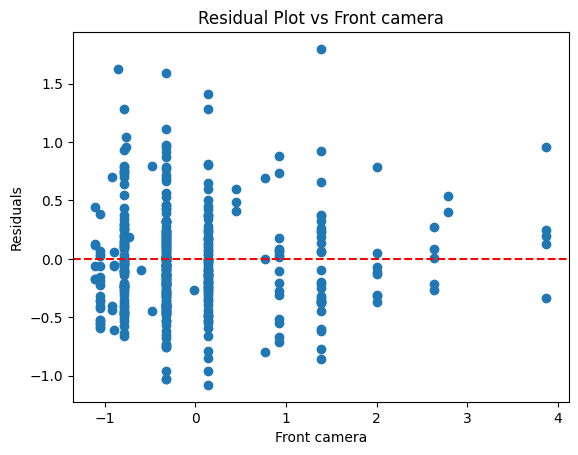

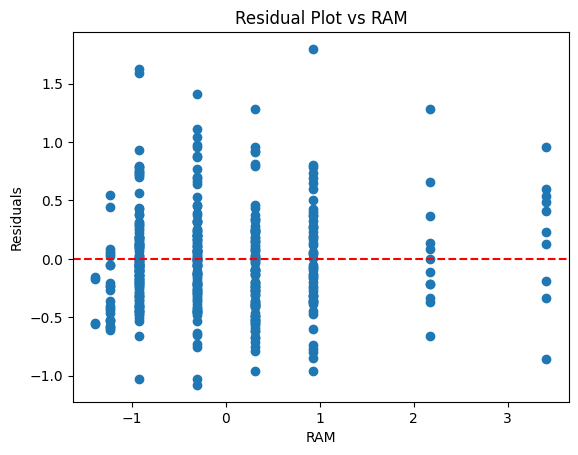

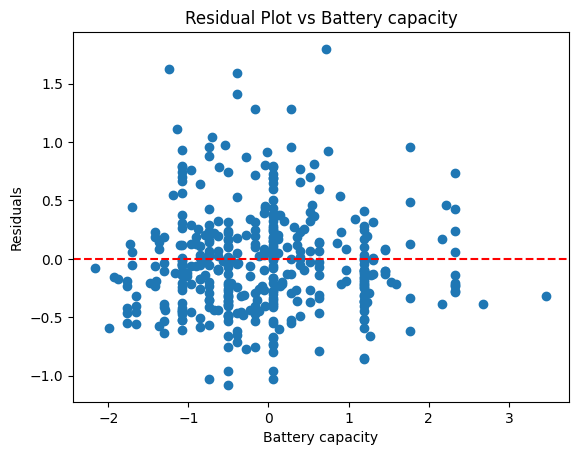

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# chuẩn hóa dữ liệu (lưu ý chỉ chuẩn hóa các cột dữ liệu liên tục)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Ghép lại các cột nhị phân không chuẩn hóa
X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

lin_reg1 = LinearRegression(fit_intercept=True)

lin_reg1.fit(X_train_scaled, y_train)
# Dự đoán
y_pred_train1 = lin_reg1.predict(X_train_scaled)
y_pred_test1 = lin_reg1.predict(X_test_scaled)


# Đánh giá
print("MÔ HÌNH 1: có hệ số chệch bias")
print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))

print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(num_cols + bin_cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")

residual = y_test - y_pred_test1
# plt.scatter(X_test_scaled["RAM"], residual)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel('RAM')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_cols + bin_cols)
features = X_test_scaled_df.columns.tolist()
print(X_test_scaled_df.columns)
for i in range(0,8):
    plt.scatter(X_test_scaled[:,i], residual)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(features[i])
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot vs {features[i]}')
    plt.show()

#### train:test = 6:4

In [413]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# chuẩn hóa dữ liệu (lưu ý chỉ chuẩn hóa các cột dữ liệu liên tục)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# Ghép lại các cột nhị phân không chuẩn hóa
X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_scaled, y_train)

# Dự đoán
y_pred_train1 = lin_reg1.predict(X_train_scaled)
y_pred_test1 = lin_reg1.predict(X_test_scaled)

# Đánh giá
print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))

print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(num_cols + bin_cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")



Hiệu suất trên tập TRAIN:
MSE: 0.1898682881763865
R2: 0.6348416980677699
MAE: 0.3234494024444048

Hiệu suất trên tập TEST:
MSE: 0.20353640799934905
R2: 0.620027869614137
MAE: 0.33943842255464257

Các hệ số (β) của mô hình:
β0 (intercept): 4.642067001800129
β (Screen size): 0.00745174732802005
β (Resolution x): 0.1436282522970658
β (Resolution y): 0.16684123619184507
β (Storage): 0.08191682364298117
β (Rear camera): 0.05272858459143018
β (Front camera): -0.07153360585100897
β (RAM): 0.2115735172347675
β (Battery capacity): 0.016241289499180994
β (SIM_2): -0.16988484305647547
β (4G_Yes): 0.01714784248739599
β (CPU_4_6): -0.038308175022836295
β (CPU_8_10): -0.05817671130879623
β (OSs_Other): 0.3283107787695215
β (OSs_iOS): 1.1716456631784689


### 2. Thực hiện trên dữ liệu đã giảm chiều


### TH1: Giảm chiều bằng PCA, giữ 4 thành phần chính đầu tiên

#### train:test = 4:1

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)

lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)


print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")


Hiệu suất trên tập TRAIN:
MSE: 0.2176130508528235
R2: 0.5775385185346092
MAE: 0.3463417057345302

Hiệu suất trên tập TEST:
MSE: 0.24567506838688669
R2: 0.5697550647811586
MAE: 0.38099131374304257

Các hệ số (β) của mô hình:
β0 (intercept): 4.483049814884443
β (PC1): 0.21549473107723258
β (PC2): 0.20431670512298666
β (PC3): -0.052263571125411634
β (PC4): 0.00021262959967471157


#### train:test = 7:3

Hiệu suất trên tập TRAIN:
MSE: 0.22400861755578513
R2: 0.5743137586334047
MAE: 0.3515050713772944

Hiệu suất trên tập TEST:
MSE: 0.2205869289841234
R2: 0.5802073545290565
MAE: 0.35958570191345224

Các hệ số (β) của mô hình:
β0 (intercept): 4.495220691771526
β (PC1): 0.21619159938804502
β (PC2): 0.2129029538353516
β (PC3): -0.04946230340708238
β (PC4): 0.009224897567905413


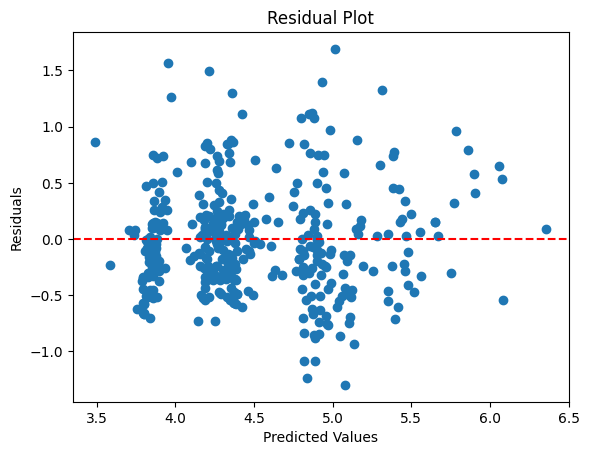

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)


print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")

residual = y_test - y_pred_test1
plt.scatter(y_pred_test1, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### train:test = 6:4

In [416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)

print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")


Hiệu suất trên tập TRAIN:
MSE: 0.21741349517891073
R2: 0.5818662322223658
MAE: 0.3466148049329255

Hiệu suất trên tập TEST:
MSE: 0.23041439914163864
R2: 0.5698506671410501
MAE: 0.359244323821666

Các hệ số (β) của mô hình:
β0 (intercept): 4.489857617439259
β (PC1): 0.2153982060455098
β (PC2): 0.2193703023360472
β (PC3): -0.05526682545268309
β (PC4): -0.01685587185888654


### TH2: Giảm chiều bằng PCA, giữ lại 6 thành phần chính đầu

#### train:test = 4:1

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)

print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))


print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")


Hiệu suất trên tập TRAIN:
MSE: 0.2114757053881002
R2: 0.5894532086100932
MAE: 0.3418052060157798

Hiệu suất trên tập TEST:
MSE: 0.2418655263858166
R2: 0.5764266255635604
MAE: 0.3754842505734054
β0 (intercept): 4.483049814884443
β (PC1): 0.21549473107723258
β (PC2): 0.20431670512298666
β (PC3): -0.05226357112541168
β (PC4): 0.00021262959967431952
β (PC5): -0.1334317178613631
β (PC6): -0.022140081012608993


#### train:test = 7:3

Hiệu suất trên tập TRAIN:
MSE: 0.21875722670561434
R2: 0.5842930391510368
MAE: 0.3470423620547338

Hiệu suất trên tập TEST:
MSE: 0.21434524320778886
R2: 0.5920857273606326
MAE: 0.35418126424980734

Các hệ số (β) của mô hình:
β0 (intercept): 4.495220691771526
β (PC1): 0.21619159938804502
β (PC2): 0.21290295383535185
β (PC3): -0.04946230340708216
β (PC4): 0.009224897567905635
β (PC5): -0.12403397214159363
β (PC6): -0.02450907414594916


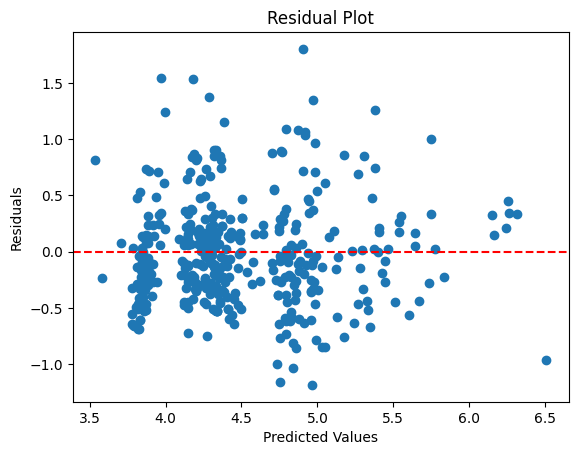

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)
lin_reg1.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)


print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")

residual = y_test - y_pred_test1
plt.scatter(y_pred_test1, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### train:test = 6:4

In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
num_cols = ['Screen size', 'Resolution x', 'Resolution y', 'Storage',
            'Rear camera', 'Front camera', 'RAM', 'Battery capacity']
bin_cols = ['SIM_2', '4G_Yes', 'CPU_4_6', 'CPU_8_10','OSs_Other','OSs_iOS']
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

X_train_scaled = np.concatenate([X_train_num_scaled, X_train[bin_cols].values], axis=1)
X_test_scaled = np.concatenate([X_test_num_scaled, X_test[bin_cols].values], axis=1)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cols_pca = [f'PC{i+1}' for i in range(pca.n_components_)]
cols = cols_pca + bin_cols

lin_reg1 = LinearRegression(fit_intercept=True)

lin_reg1.fit(X_train_pca, y_train)
lin_reg2.fit(X_train_pca, y_train)

y_pred_train1 = lin_reg1.predict(X_train_pca)
y_pred_test1 = lin_reg1.predict(X_test_pca)

print("Hiệu suất trên tập TRAIN:")
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("R2:", r2_score(y_train, y_pred_train1))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))
print("\nHiệu suất trên tập TEST:")
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("R2:", r2_score(y_test, y_pred_test1))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

print("\nCác hệ số (β) của mô hình:")
print(f"β0 (intercept): {lin_reg1.intercept_}")
for name, coef in zip(cols, lin_reg1.coef_):
    print(f"β ({name}): {coef}")


Hiệu suất trên tập TRAIN:
MSE: 0.21165210651920424
R2: 0.5929466444384153
MAE: 0.34202335615832813

Hiệu suất trên tập TEST:
MSE: 0.22633258726331826
R2: 0.5774708013985275
MAE: 0.35563650715240946

Các hệ số (β) của mô hình:
β0 (intercept): 4.489857617439259
β (PC1): 0.2153982060455098
β (PC2): 0.21937030233604715
β (PC3): -0.055266825452683015
β (PC4): -0.016855871858886567
β (PC5): -0.12778664327746395
β (PC6): -0.031001594717364772
